## Assignment-12: TensorFlow and Keras: Build various MLP architectures for MNIST dataset 

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal


In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [35]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [37]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

### Model1 Input(784)-ReLu(256)-ReLu(64)-Softmax(output)

In [104]:
# start building a model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_77 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_78 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [105]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2751 - acc: 0.9202 - val_loss: 0.1400 - val_acc: 0.9587
Epoch 2/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1098 - acc: 0.9678 - val_loss: 0.0992 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0701 - acc: 0.9793 - val_loss: 0.0838 - val_acc: 0.9736
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0514 - acc: 0.9841 - val_loss: 0.0707 - val_acc: 0.9781
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0369 - acc: 0.9886 - val_loss: 0.0842 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0290 - acc: 0.9910 - val_loss: 0.0703 - val_acc: 0.9791
Epoch 7/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0225 - acc: 0.9934 - val_loss: 0.0734 - val_a

Test score: 0.11553556742085926
Test accuracy: 0.976


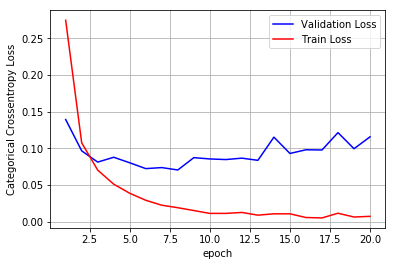

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

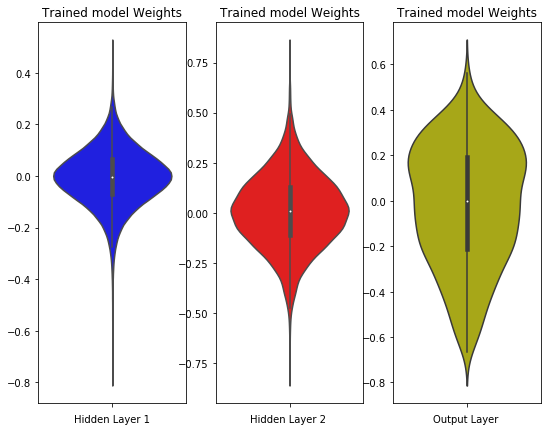

In [57]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize =(9, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observation:
    From above plot we can see that almost weights of hidden layers are following Gaussian curves.

### Model1 Input(784)-ReLu(256)-ReLu(64)-Softmax(output) + bach normalization

In [58]:
# start building a model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 219,338
Trainable params: 218,698
Non-trainable params: 640
_________________________________________________________________


In [59]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.2542 - acc: 0.9259 - val_loss: 0.1182 - val_acc: 0.9660
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0918 - acc: 0.9728 - val_loss: 0.0987 - val_acc: 0.9699
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0591 - acc: 0.9826 - val_loss: 0.0871 - val_acc: 0.9720
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0422 - acc: 0.9870 - val_loss: 0.0849 - val_acc: 0.9740
Epoch 5/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0314 - acc: 0.9903 - val_loss: 0.0845 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0258 - acc: 0.9922 - val_loss: 0.0842 - val_acc: 0.9741
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0194 - acc: 0.9942 - val_loss: 0.0861 - val_ac

Test score: 0.10765320910201372
Test accuracy: 0.9749


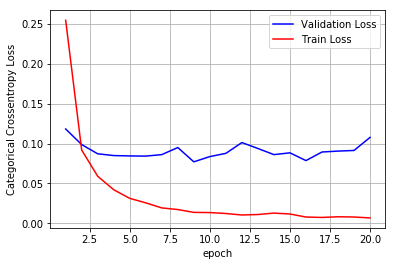

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

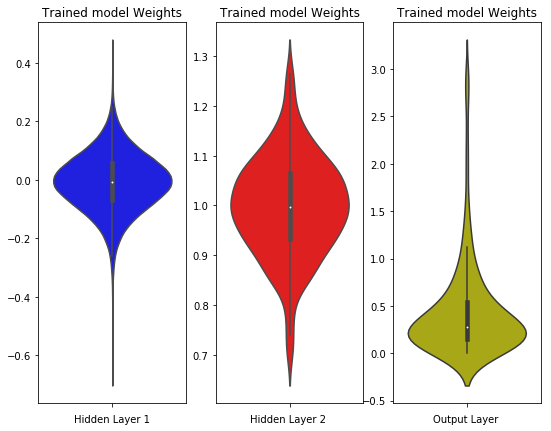

In [61]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize =(9, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observation:
    From above plot we can see that almost weights of hidden layers are following Gaussian curves.

### Model1 Input(784)-ReLu(256)-ReLu(64)-Softmax(output) + dropout

In [62]:
# start building a model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_14 (Batc (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

In [63]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.6183 - acc: 0.8128 - val_loss: 0.2012 - val_acc: 0.9396
Epoch 2/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.3014 - acc: 0.9122 - val_loss: 0.1435 - val_acc: 0.9565
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2380 - acc: 0.9307 - val_loss: 0.1209 - val_acc: 0.9625
Epoch 4/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.2007 - acc: 0.9419 - val_loss: 0.1043 - val_acc: 0.9679
Epoch 5/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1785 - acc: 0.9483 - val_loss: 0.1013 - val_acc: 0.9700
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1666 - acc: 0.9512 - val_loss: 0.0950 - val_acc: 0.9706
Epoch 7/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1517 - acc: 0.9556 - val_loss: 0.0920 - val_ac

Test score: 0.0649311569688085
Test accuracy: 0.9813


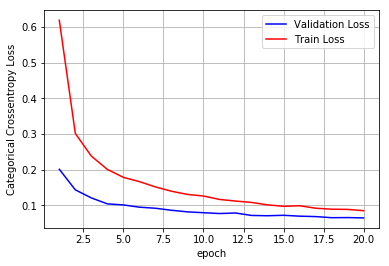

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting converged.

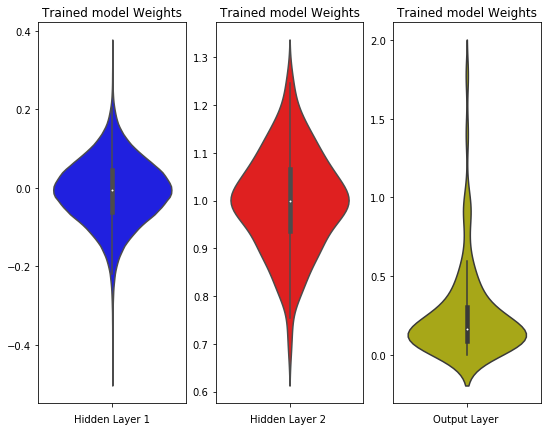

In [29]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize =(9, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observation:
    From above plot we can see that almost weights of hidden layers are following Gaussian curves.

### Model2 Input(784)-ReLu(512)-ReLu(256)-ReLu(64)-Softmax(output)

In [65]:
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_35 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_36 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                650       
Total params: 550,346
Trainable params: 550,346
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.2299 - acc: 0.9312 - val_loss: 0.1146 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0842 - acc: 0.9739 - val_loss: 0.0869 - val_acc: 0.9728
Epoch 3/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0557 - acc: 0.9827 - val_loss: 0.0838 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0362 - acc: 0.9888 - val_loss: 0.0813 - val_acc: 0.9750
Epoch 5/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0278 - acc: 0.9909 - val_loss: 0.0711 - val_acc: 0.9778
Epoch 6/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0257 - acc: 0.9914 - val_loss: 0.0871 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0187 - acc: 0.9938 - val_loss: 0.0872 

Test score: 0.13140155728461897
Test accuracy: 0.975


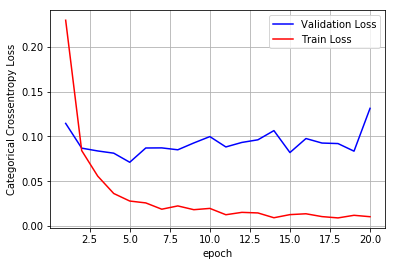

In [67]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

Text(0.5, 0, 'Output Layer ')

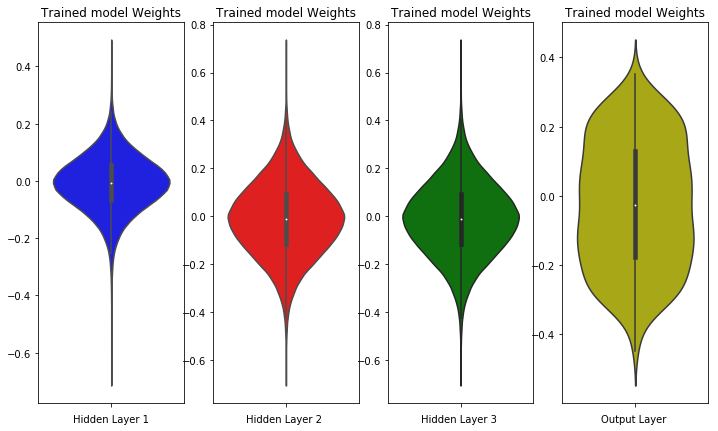

In [68]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize =(12, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')



#### Observation:
    From above plot we can see that almost weights of hidden layers are following Gaussian curves.

### Model2 Input(784)-ReLu(512)-ReLu(256)-ReLu(64)-Softmax(output)+ bach normal

In [69]:
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dense_40 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_17 (Batc (None, 64)                256       
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

In [70]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.2133 - acc: 0.9372 - val_loss: 0.1006 - val_acc: 0.9700
Epoch 2/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0735 - acc: 0.9781 - val_loss: 0.0886 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0466 - acc: 0.9855 - val_loss: 0.0852 - val_acc: 0.9745
Epoch 4/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0346 - acc: 0.9886 - val_loss: 0.0776 - val_acc: 0.9756
Epoch 5/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0280 - acc: 0.9908 - val_loss: 0.0757 - val_acc: 0.9777
Epoch 6/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.0218 - acc: 0.9930 - val_loss: 0.0825 - val_acc: 0.9770
Epoch 7/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0190 - acc: 0.9935 - val_loss: 0.

Test score: 0.08862994182043185
Test accuracy: 0.9793


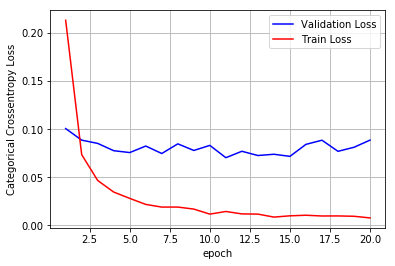

In [71]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

Text(0.5, 0, 'Output Layer ')

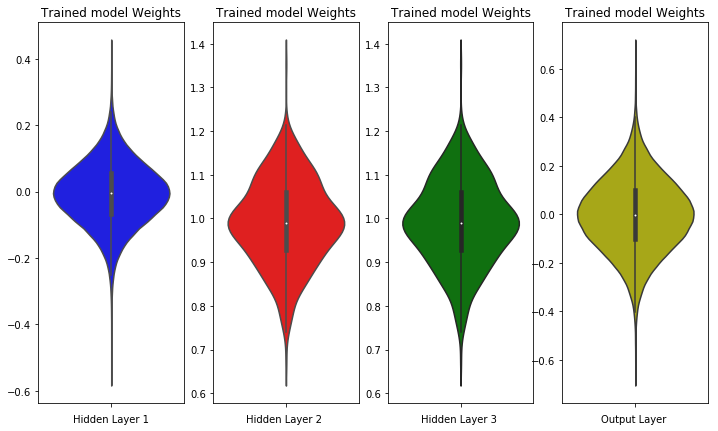

In [72]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize =(12, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')



#### Observation:
    From above plot we can see that almost weights of all the layer are following Gaussian curves.

### Model2 Input(784)-ReLu(512)-ReLu(256)-ReLu(64)-Softmax(output)+dropout

In [73]:
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)              

In [74]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.7101 - acc: 0.7828 - val_loss: 0.1946 - val_acc: 0.9398
Epoch 2/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.3044 - acc: 0.9120 - val_loss: 0.1350 - val_acc: 0.9585
Epoch 3/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.2296 - acc: 0.9346 - val_loss: 0.1146 - val_acc: 0.9636
Epoch 4/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.1932 - acc: 0.9449 - val_loss: 0.1015 - val_acc: 0.9684
Epoch 5/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.1672 - acc: 0.9526 - val_loss: 0.0897 - val_acc: 0.9725
Epoch 6/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.1507 - acc: 0.9571 - val_loss: 0.0861 - val_acc: 0.9745
Epoch 7/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.1370 - acc: 0.9612 - val_loss: 0.

Test score: 0.05926523524474469
Test accuracy: 0.9832


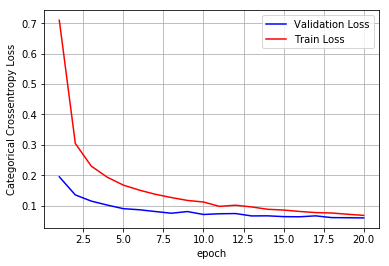

In [75]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting converged.

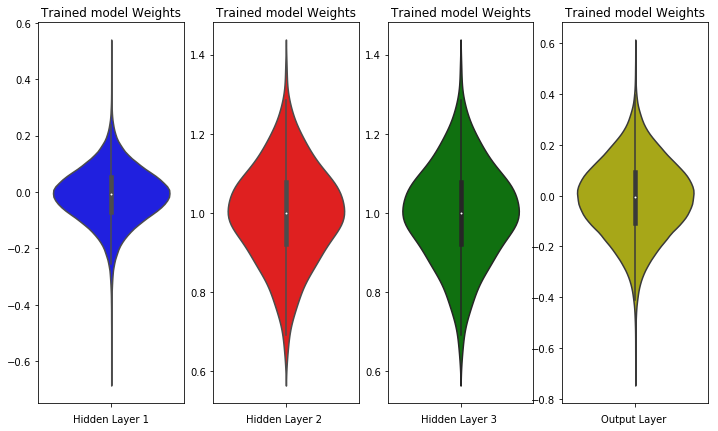

In [76]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize =(12, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')


plt.show()

#### Observation:
    From above plot we can see that almost weights of all the layer are following Gaussian curves.

### Model3 Input(784)-ReLu(512)-ReLu(256)-ReLu(128)-ReLu(64)-ReLu(32)-Softmax(output) 

In [83]:
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_59 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_60 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_61 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_62 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_63 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [84]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.2757 - acc: 0.9161 - val_loss: 0.1262 - val_acc: 0.9628
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0986 - acc: 0.9701 - val_loss: 0.1128 - val_acc: 0.9650
Epoch 3/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0665 - acc: 0.9787 - val_loss: 0.0842 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0460 - acc: 0.9858 - val_loss: 0.0795 - val_acc: 0.9751
Epoch 5/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0389 - acc: 0.9872 - val_loss: 0.0742 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0362 - acc: 0.9881 - val_loss: 0.0797 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0275 - acc: 0.9908 - val_loss: 0.

Test score: 0.0980869815425057
Test accuracy: 0.9793


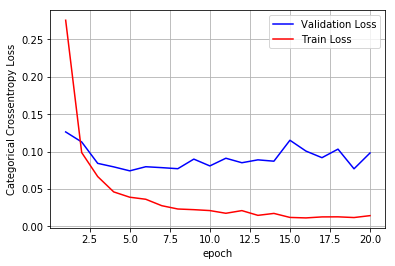

In [85]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

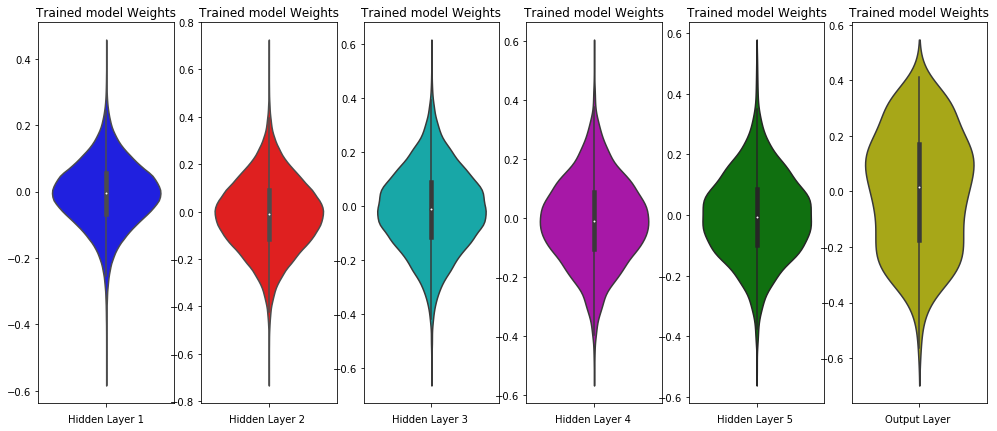

In [86]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize =(17, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='m')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')


plt.show()

#### Observation:
    From above plot we can see that almost weights of all the layer are following Gaussian curves.

### Model3 Input(784)-ReLu(512)-ReLu(256)-ReLu(128)-ReLu(64)-ReLu(32)-Softmax(output) + bach normal

In [87]:
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
dense_65 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_32 (Batc (None, 256)               1024      
_________________________________________________________________
dense_66 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_33 (Batc (None, 128)               512       
_________________________________________________________________
dense_67 (Dense)             (None, 64)              

In [88]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 298us/step - loss: 0.2689 - acc: 0.9232 - val_loss: 0.1195 - val_acc: 0.9648
Epoch 2/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0884 - acc: 0.9736 - val_loss: 0.0813 - val_acc: 0.9747
Epoch 3/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0607 - acc: 0.9815 - val_loss: 0.0871 - val_acc: 0.9739
Epoch 4/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.0462 - acc: 0.9855 - val_loss: 0.0820 - val_acc: 0.9750
Epoch 5/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.0363 - acc: 0.9884 - val_loss: 0.0715 - val_acc: 0.9791
Epoch 6/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.0321 - acc: 0.9896 - val_loss: 0.0861 - val_acc: 0.9735
Epoch 7/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.0289 - acc: 0.9907 - val_loss: 0.

Test score: 0.09136940934397571
Test accuracy: 0.9782


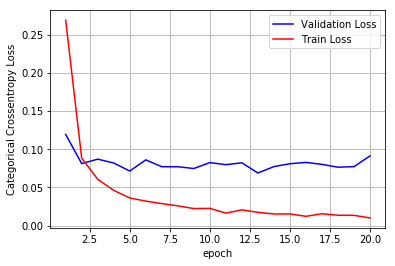

In [89]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

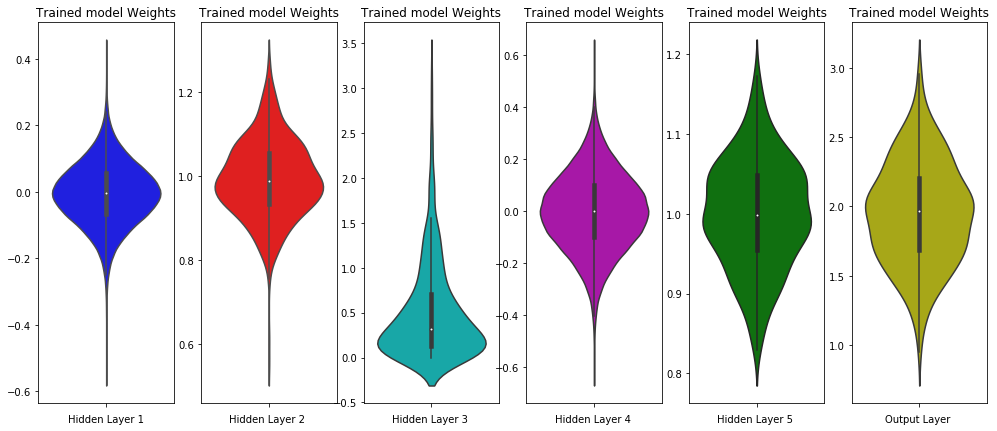

In [90]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize =(17, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='m')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')


plt.show()

#### Observation:
    From above plot we can see that almost weights of all the layer are following Gaussian curves.

### Model3 Input(784)-ReLu(512)-ReLu(256)-ReLu(128)-ReLu(64)-ReLu(32)-Softmax(output) + dropout

In [91]:
warnings.filterwarnings('ignore')
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_36 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_37 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)             

In [92]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 335us/step - loss: 1.5869 - acc: 0.4641 - val_loss: 0.4605 - val_acc: 0.8716
Epoch 2/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.6970 - acc: 0.7855 - val_loss: 0.2485 - val_acc: 0.9323
Epoch 3/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.4628 - acc: 0.8733 - val_loss: 0.1858 - val_acc: 0.9485
Epoch 4/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.3676 - acc: 0.9053 - val_loss: 0.1498 - val_acc: 0.9612
Epoch 5/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.3076 - acc: 0.9250 - val_loss: 0.1316 - val_acc: 0.9647
Epoch 6/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.2696 - acc: 0.9350 - val_loss: 0.1271 - val_acc: 0.9674
Epoch 7/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.2457 - acc: 0.9425 - val_loss: 0.

Test score: 0.07896328407421242
Test accuracy: 0.9808


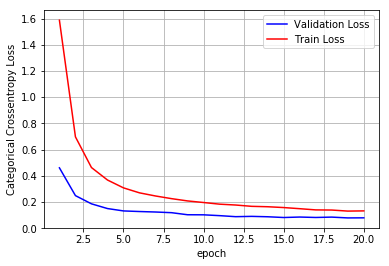

In [93]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting converged.

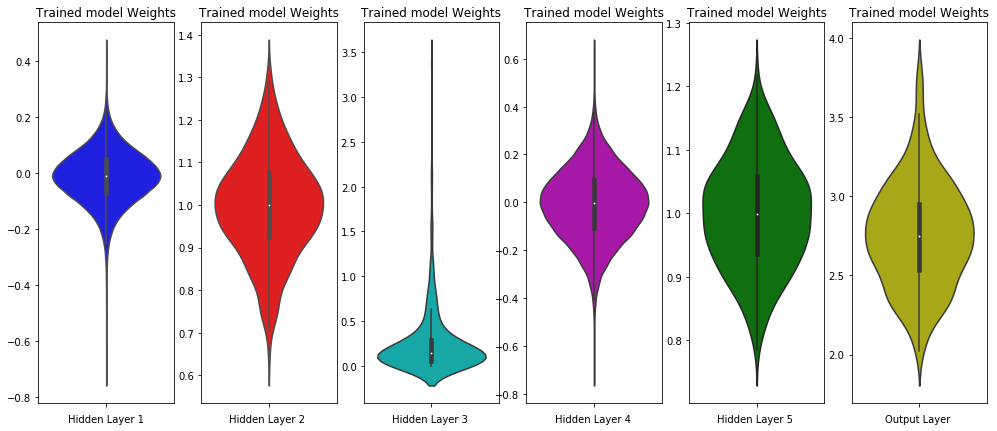

In [94]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize =(17, 7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='m')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')


plt.show()

#### Observation:
    From above plot we can see that almost weights of all the layer are following Gaussian curves.

In [103]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model","method", "Total Params ", "Test Accuracy","Epoch vs loss graph"]

x.add_row(["Model1(780x 256 x 64 x 10)",'Normal','218,058',0.9760,'Diverge'])
x.add_row(["Model1(780x 256 x 64 x 10)",'Batch Normal', '219,338', 0.9782,'Diverge'])
x.add_row(["Model1(780x 256 x 64 x 10)",'Dropout', '219,338', 0.98,'Converge'])
x.add_row(["------------------------------------",'-------', '-------', '---','--------'])
x.add_row(["Model2(780x 512 x 256 x 64 x 10)",'Normal','550,346',  0.975,'Diverge'])
x.add_row(["Model2(780x 512 x 256 x 64 x 10)",'Batch Normal','553,674', 0.9793,'Diverge'])
x.add_row(["Model2(780x 512 x 256 x 64 x 10)",'Dropout','553,674',0.98,'Converge'])  
x.add_row(["------------------------------------",'-------', '-------', '---','---------'])
x.add_row(["Model3(780x 512 x 256 x 128 x 64 x 32 x 10)",'Normal','576,810', 0.9793,'Diverge'])
x.add_row(["Model3(780x 512 x 256 x 128 x 64 x 32 x 10)",'Batch Normal','580,778', 0.9782,'Diverge'])
x.add_row(["Model3(780x 512 x 256 x 128 x 64 x 32 x 10)",'Dropout','580,778', 0.98,'Converge'])
print(x)

+---------------------------------------------+--------------+---------------+---------------+---------------------+
|                    Model                    |    method    | Total Params  | Test Accuracy | Epoch vs loss graph |
+---------------------------------------------+--------------+---------------+---------------+---------------------+
|          Model1(780x 256 x 64 x 10)         |    Normal    |    218,058    |     0.976     |       Diverge       |
|          Model1(780x 256 x 64 x 10)         | Batch Normal |    219,338    |     0.9782    |       Diverge       |
|          Model1(780x 256 x 64 x 10)         |   Dropout    |    219,338    |      0.98     |       Converge      |
|     ------------------------------------    |   -------    |    -------    |      ---      |       --------      |
|       Model2(780x 512 x 256 x 64 x 10)      |    Normal    |    550,346    |     0.975     |       Diverge       |
|       Model2(780x 512 x 256 x 64 x 10)      | Batch Normal |  

### Conclusion:



* Accuracy of all the Models when we consider bach normalization and dropout are almost same.
* From Violin plot, we can see that almost weights of all the hidden layer are following Gaussian curves.
* From Categorical Crossentropy Loss vs Epoch, we can see that train and test data loss are getting converged when we consider batch normalization and dropout.